<a href="https://colab.research.google.com/github/ajaykumarsangem/PRODIGY_DS_2/blob/main/Data_cleaning_and_exploratory_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import folium
import plotly.express as px
import os

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Selfie_Related_Injuries.csv")
df

,Date,Country,Injuries/Casualties,Type,Description
0,15 October 2011,United States,3,Transport,"Three teenagers (two sisters and a friend) were killed by a train while posing for a selfie that was found on their phone. Shortly before, they posted the message ""Standing right by a train ahaha this is awesome!!!!"" to Facebook."
1,March 2014,Spain,1,Electrocution,A 21-year-old man was electrocuted after climbing on top of a train to take a selfie with friends and touching a wire that (contrary to the assumptions of the group) turned out to be live. One of the friends was hospitalized in serious condition.
2,March 2014,Russia,1,Transport,"Two people were walking near train tracks when a train approached them and one of the people on the tracks moved away and the second, a 15-year-old, was attempting to take a selfie when a collision occurred with the train and she was killed."
3,April 2014,United States,1,Transport,"A 32-year-old woman from North Carolina was driving and veered her vehicle across the center median. Her vehicle collided with a recycling truck, left the road, hit a tree, and burst into flames – moments after posting selfies online when she heard Pharrell Williams' song ""Happy"". The truck driver was unharmed."
4,22 April 2014,Russia,1,Fall,"A 17-year-old girl fell 30 ft to her death after being hit by 1,500 volts when attempting to grab live wires on a railway bridge."
...,...,...,...,...,...
187,16 May 2021,Indonesia,9,Drowned,"A boat overloaded with 20 people in a reservoir in Central Java capsized when the passengers all suddenly moved to one side of the vessel, which was helmed by a 13-year-old, to take a group selfie. Nine of the passengers drowned, including two children."
188,10 July 2021,Hong Kong,1,Fall,"32-year-old influencer Sofia Cheung died after slipping and falling 5 meters in the nature park Ha Pak Lai, while she was taking a selfie with friends at the edge of a waterfall. Her Instagram account featured photos of her outdoor adventures, including scaling cliffs and mountaintops."
189,11 July 2021,India,11,Electrocution,"Eleven people died in the Indian state of Rajasthan after being struck by lightning near a watchtower at the Amer Fort. According to police, some of the victims were taking selfies near the tower."
190,28 July 2021,Italy,1,Fall,"A 22-year-old YouTuber from Denmark died after falling 200 meters from Forcella di Pana, Italy while he was recording for his channel."


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 192 non-null    object
 1   Country              192 non-null    object
 2   Injuries/Casualties  192 non-null    int64 
 3   Type                 192 non-null    object
 4   Description          192 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.6+ KB


In [9]:
df.tail(4)

,Date,Country,Injuries/Casualties,Type,Description
188,10 July 2021,Hong Kong,1,Fall,32-year-old influencer Sofia Cheung died after...
189,11 July 2021,India,11,Electrocution,Eleven people died in the Indian state of Raja...
190,28 July 2021,Italy,1,Fall,A 22-year-old YouTuber from Denmark died after...
191,6 August 2021,Hungary,1,Fall,A 19-year-old Dutch citizen died after falling...


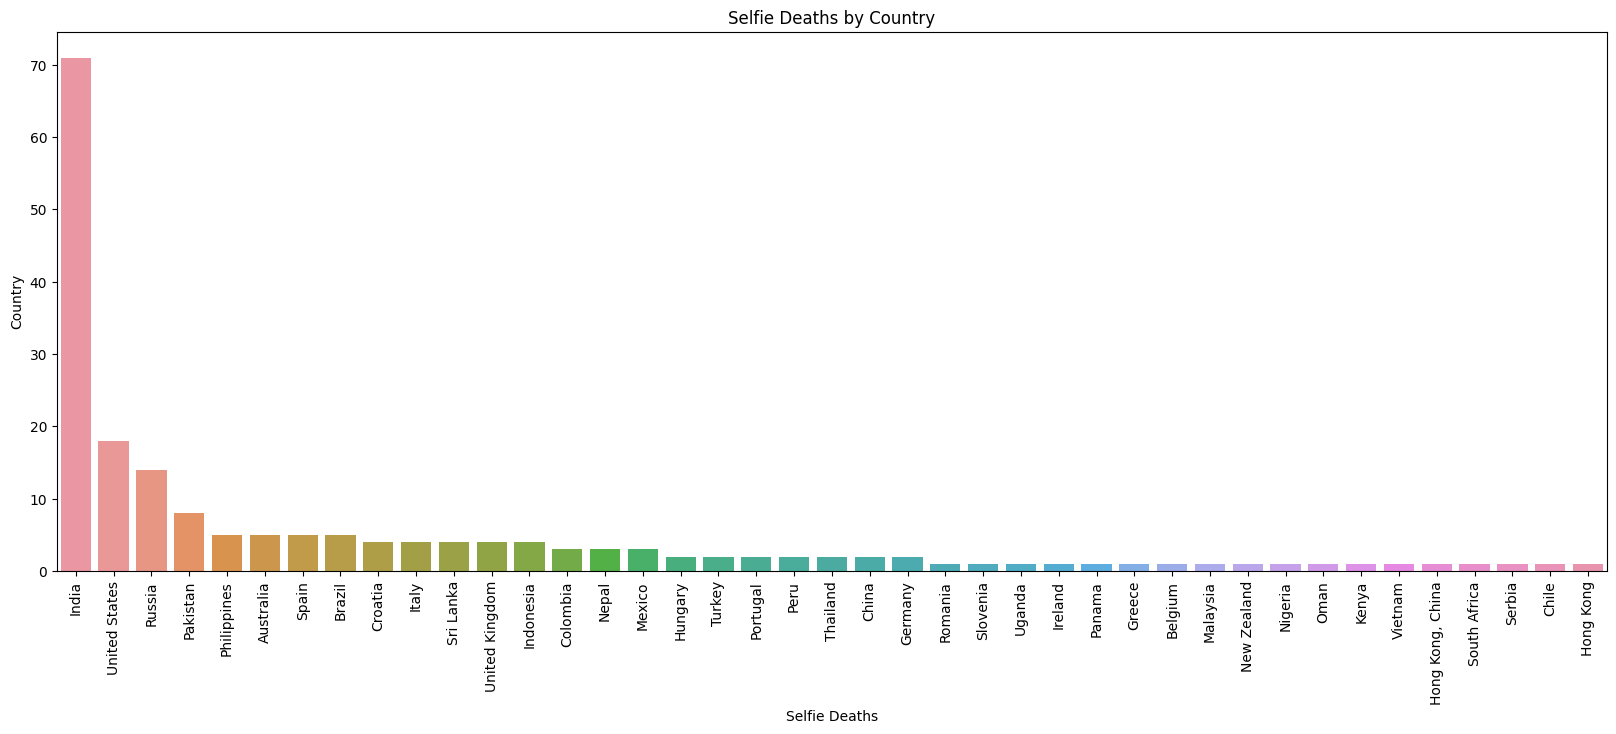

In [37]:
df1_country = df["Country"].value_counts().reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="index",y="Country",data =df1_country).set(title = "Selfie Deaths by Country",xlabel ='Selfie Deaths',ylabel='Country')
plt.xticks(rotation =90)
plt.show()

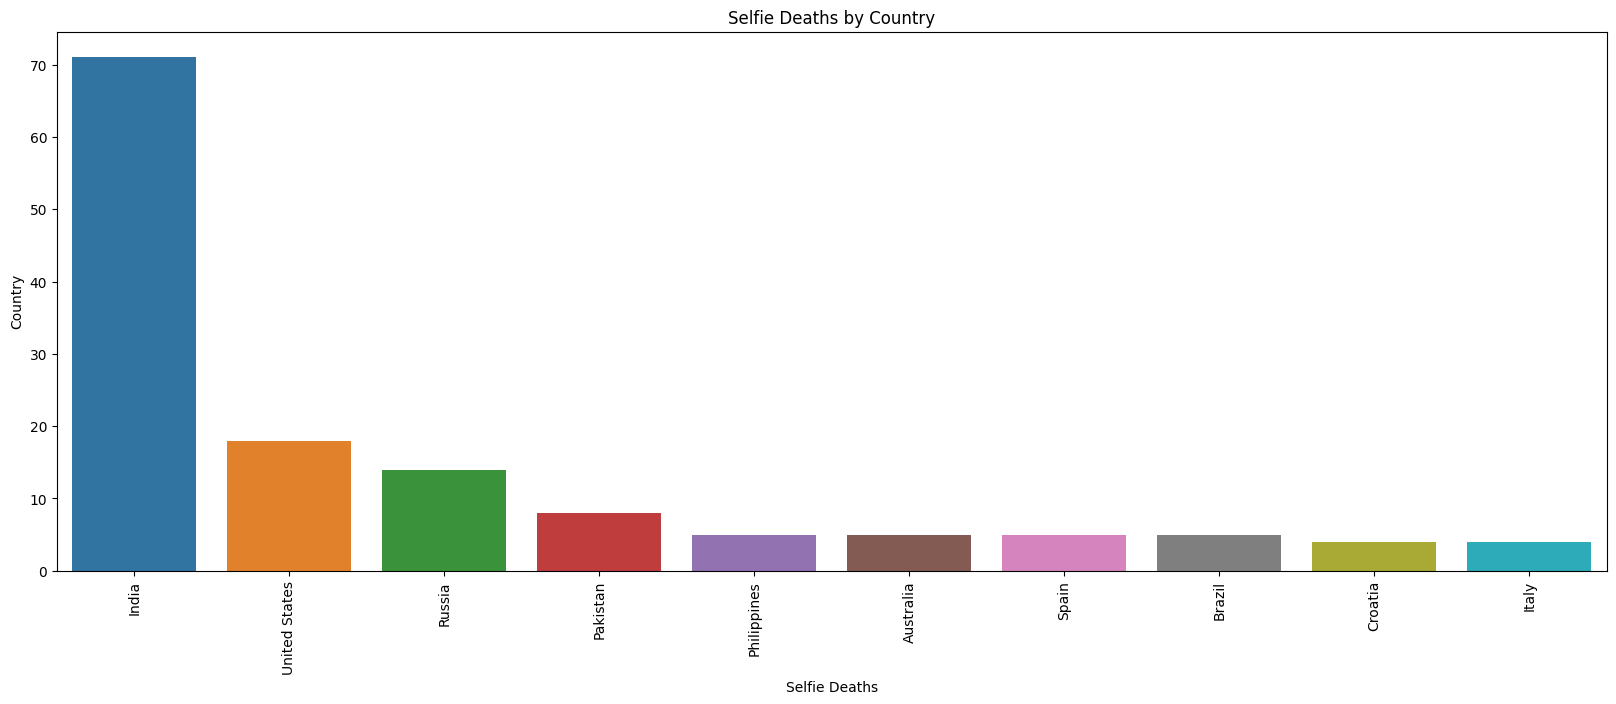

In [12]:
df1_country = df["Country"].value_counts().reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="index",y="Country",data =df1_country[:10]).set(title = "Selfie Deaths by Country",xlabel ='Selfie Deaths',ylabel='Country')
plt.xticks(rotation =90)
plt.show()

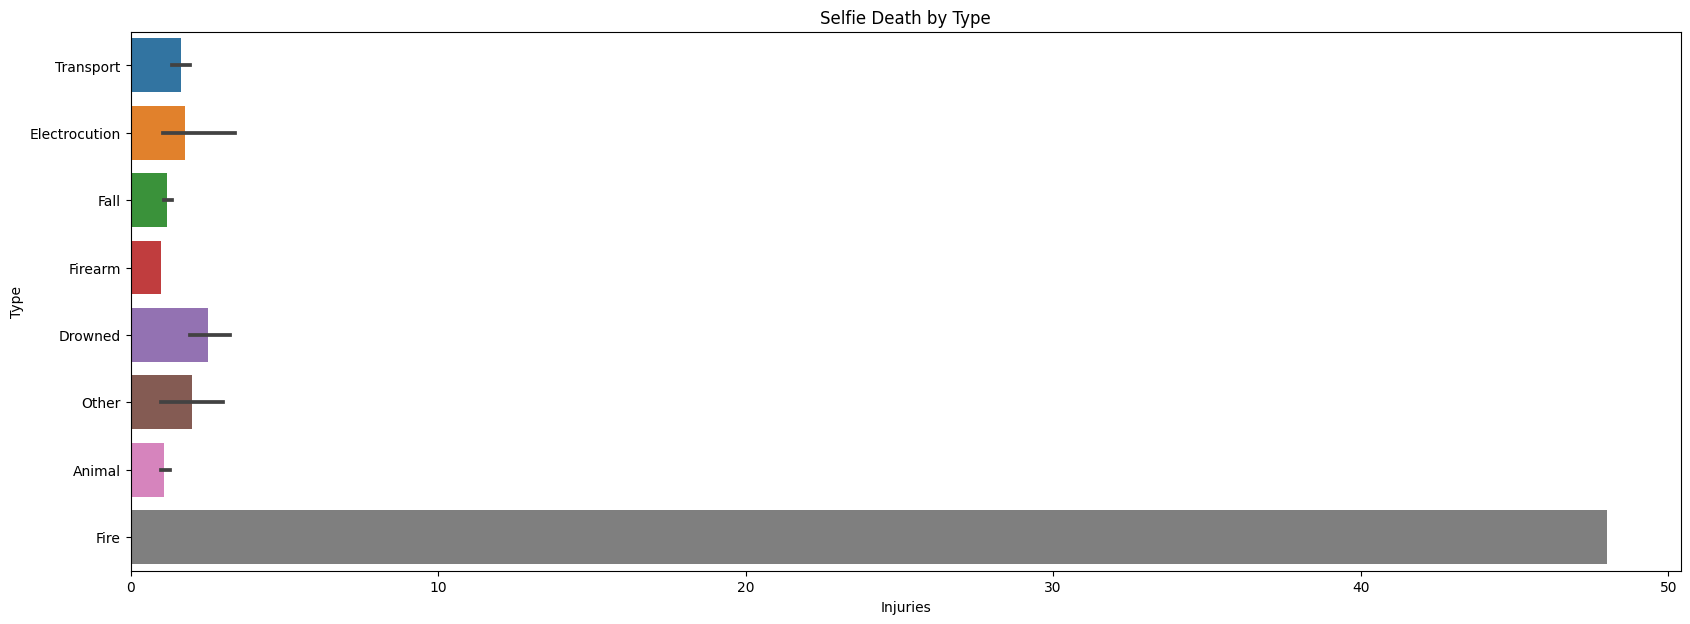

In [14]:
df1_Type = df['Type'].value_counts().reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x = "Injuries/Casualties", y='Type',data=df).set(title="Selfie Death by Type",xlabel="Injuries",ylabel="Type")
plt.show()

In [15]:
df.Date = pd.Series(df.Date)

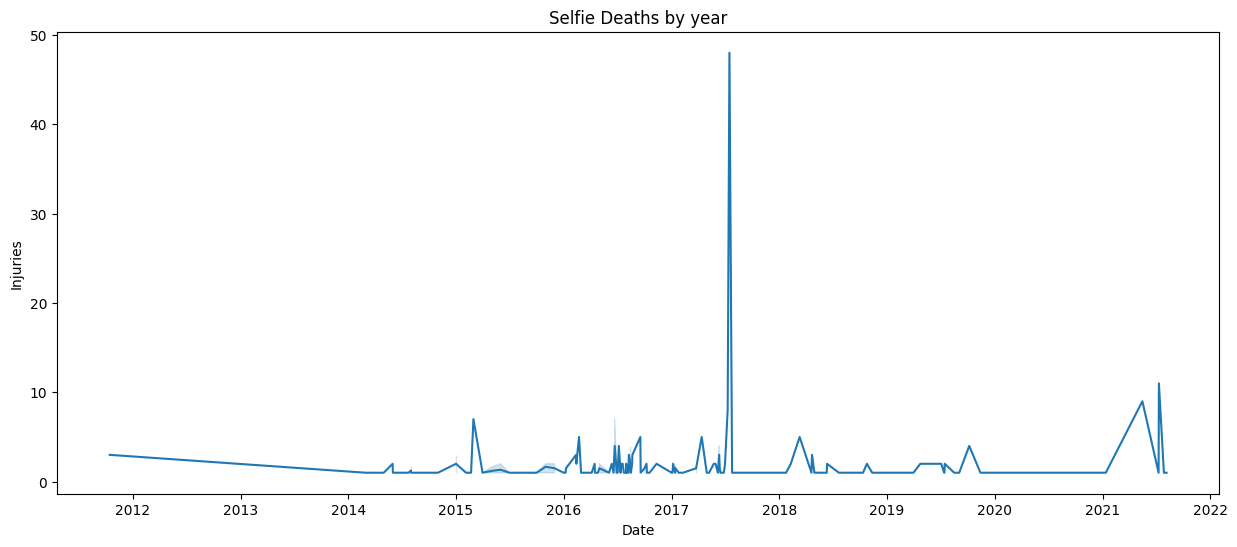

In [18]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,6))
df["Date"] =pd.to_datetime(df.Date)
sns.lineplot(x="Date",y ="Injuries/Casualties",data =df).set(title="Selfie Deaths by year",xlabel="Date",ylabel="Injuries")
plt.show()

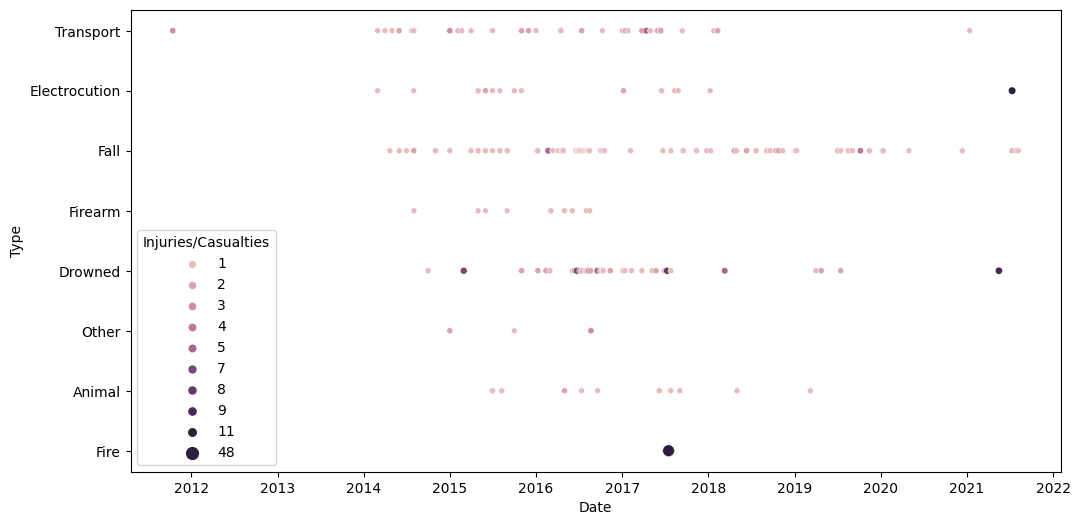

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Date",y="Type",hue="Injuries/Casualties",size="Injuries/Casualties",hue_norm=(0,10),legend="full")
plt.show()

In [29]:
df2_2017_2018 = df[(df["Date"] >='2017')&(df["Date"] <='2018')]
df2_2017_2018.head()
df2_2017_2018.tail

<bound method NDFrame.tail of           Date         Country  Injuries/Casualties           Type  \
114 2017-01-01           India                    1      Transport   
115 2017-01-04        Pakistan                    1        Drowned   
116 2017-01-06         Croatia                    2  Electrocution   
117 2017-01-13           India                    1        Drowned   
118 2017-01-14           India                    1      Transport   
119 2017-01-14           India                    2      Transport   
120 2017-01-25           India                    1      Transport   
121 2017-02-05           India                    1           Fall   
122 2017-02-09     New Zealand                    1        Drowned   
123 2017-03-25   United States                    1        Drowned   
124 2017-03-25          Mexico                    2      Transport   
125 2017-04-13           India                    5      Transport   
126 2017-04-30         Germany                    1      Tra

In [30]:
plt.figure(figsize=(20,6))
df2_2017_2018.sort_values(by=["Type"],ascending=False,inplace=True)
df2_2017_2018.head(20)

,Date,Country,Injuries/Casualties,Type,Description
114,2017-01-01,India,1,Transport,A 21-year-old engineering student died when he...
124,2017-03-25,Mexico,2,Transport,"In the city of Chínipas de Almada, Chihuahua, ..."
148,2017-09-12,United Kingdom,1,Transport,A 41-year-old woman from New Zealand who took ...
132,2017-06-11,Russia,4,Transport,Four children aged 10 to 13 were hit by a trai...
131,2017-06-11,Sri Lanka,2,Transport,Two youths from same family in Sri Lanka were ...
129,2017-05-30,India,2,Transport,"At Alwal Railway station near Secunderabad, In..."
126,2017-04-30,Germany,1,Transport,A Scottish man was knocked down and killed aft...
125,2017-04-13,India,5,Transport,Police said Taraknath Makal was travelling by ...
133,2017-06-13,Sri Lanka,2,Transport,A 24-year-old groom was killed and his bride s...
118,2017-01-14,India,1,Transport,A second-year college student died while takin...


<Figure size 2000x600 with 0 Axes>

In [34]:
print(df.Description.loc[[141]])


141    48 people were injured when standing too close to a burning bakery in Chennai, India, to take selfies. They repeatedly ignored warnings advising them to move away from the blaze.
Name: Description, dtype: object


In [33]:
pd.set_option('display.max_colwidth',None)
print(df.Description.loc[[141]])

141    48 people were injured when standing too close to a burning bakery in Chennai, India, to take selfies. They repeatedly ignored warnings advising them to move away from the blaze.
Name: Description, dtype: object
